# Problema 1: 

Hay dos formas de calcularlo. Primero la versión larga: 

### Versión Larga

Lo primero que hay que hacer, para los 4 incisos, es calcular la probabilidad de que en el tiro n, salga un As cualquiera. Para esto, tenemos que calcular el número de combinaciones totales que hay en los primeros $n-1$ tiros. Esto es simplemente el número de permutaciones de 52 cartas en $n-1$ lugares, es decir: 

$|\Omega(n-1)| = \frac{52!}{(53-n)!}$

El segundo paso es calcular el número de combinaciones de las $n-1$ cartas, donde ninguna es un As. Es decir, las permutaciones de 48 cartas en $n-1$ lugares: 

$|\Omega_{As}(n-1)| = \frac{48!}{(49-n)!}$

Esto nos implica que la probabilidad de no sacar un As en los primeros $n-1$ tiros es: 

$\frac{|\Omega_{As}(n-1)|}{|\Omega(n-1)|} =  \frac{48!}{52!} \frac{(53-n)!}{(49-n)!} = \frac{(53-n) (52-n) (51-n) (50-n)}{52\cdot 51 \cdot 50 \cdot 49}$

Esto, multiplicado por la probabilidad de que entre las $53-n$ cartas restantes salga el primer As, nos da la probabilidad $p(n)$ de que el primer As salga al $n$-simo tiro. Puesto que hay 4 Ases, la probabilidad $p(n)$ será: 

$p(n) = \frac{(53-n) (52-n) (51-n) (50-n)}{52\cdot 51 \cdot 50 \cdot 49} \frac{4}{53-n} = \frac{4 (52-n) (51-n) (50-n)}{52\cdot 51 \cdot 50 \cdot 49}$

La probabilidad de que el primer As sea uno de espadas es $1/4$, por lo que la probabilidad de que no lo sea es $3/4$. Si multiplicamos esto por $p(n)$, tendremos la probabilidad de que entre las $52-n$ cartas restantes se encuentre el As de espadas. La probabilidad de que en esas cartas salga una carta particular, como lo es el As de espadas, es $\frac{1}{52-n}$, por lo que la probabilidad de que al $n+1$ tiro salga el As de espadas y que al $n$-esimo tiro salga cualquier otro As, es entonces: 

$\frac{3}{4} p(n) \frac{1}{52-n} =  \frac{3 (51-n) (50-n)}{52\cdot 51 \cdot 50 \cdot 49}$ 

Para calcular la probabilidad general de que después del primer As, salga un As de espadas, simplemente tenemos que hacer la suma de esta última probabilidad desde $n=1$ hasta $49$. Para hacerlo podemos usar las fórmulas de la suma de $n$ y la suma de $n^2$, con lo cual al final se obtiene $\frac{1}{52}$. También podemos usar un código en Julia para verificar que la suma da efectivamente eso: 

In [1]:
suma = 0

for n in 1:49
    suma += 3//(52*51*50*49) *(51-n)*(50-n)
end
suma

1//52

El segundo inciso considera el caso de sacar un J de corazones después del primer As. Para esto usaremos $p(n)$ calculado en el inciso anterior. La probabilidad de que salja el J en el $n$-simo tiro después de un As, debe ser $p(n)$ por la probabilidad de que no haya salido el J, por la probabilidad de que salga entre las restantes $52-n$ cartas. 

La probabilidad de que no haya salido en los primeros $n-1$ tiros, lo calculamos igual que calculamos la probabilidad de que no hubiera salido un As, pero considerando ahora que en esas primeras $n-1$ cartas no hay $5$, los cuatro Ases y el J. Y el cálculo no lo hacemos sobre todas las configuraciones totales, sino sobre las configuraciones $\Omega_{As}(n-1)$. Es decir, la probabilidad de que no haya salido el J de corazones es: 

$\frac{47!}{(48-n)!} / (\frac{48!}{(49-n)!}) = \frac{(49-n)}{48} $

Por otra parte, la probabilidad de que salga el J en el $n+1$ tiro es $\frac{1}{52-n}$, por lo que la probabilidad de que al $n$-simo tiro salga un As y al $(n+1)$-simo tiro salga un J de corazones es: 

$\frac{(49-n)}{48}  p(n) \frac{1}{52-n} =  \frac{4 (51-n) (50-n) (49-n)}{52\cdot 51 \cdot 50 \cdot 49 \cdot 48}$ 

que sumando sobre las $n$'s desde $n=1$ hasta $48$ obtenemos también $\frac{1}{52}$. También podemos usar las fórmulas de la suma sobre $n$, $n^2$ y $n^3$ para calcular esto, o bien, con un código en Julia: 



In [2]:
suma = 0

for n in 1:48
    suma += 4//(52*51*50*49*48) *(51-n)*(50-n)*(49-n)
end
suma

1//52

Aquí un código para hacer el experimento numéricamente: 

In [3]:
baraja = ["AsC"; "AsD"; "AsT"; "AsE"; "2C"; "2D"; "2T"; "2E"; "3C"; "3D"; "3T"; "3E"; "4C"; "4D"; "4T"
    ; "4E"; "5C"; "5D"; "5T"; "5E"; "6C"; "6D"; "6T"; "6E"; "7C"; "7D"; "7T"; "7E"; "8C"; "8D"; "8T"; "8E"; "9C"; "9D"; "9T"; "9E";
"10C"; "10D"; "10T"; "10E"; "JC"; "JD"; "JT"; "JE"; "QC"; "QD"; "QT"; "QE"; "RC"; "RD"; "RT"; "RE"]
function carta(A)
    A2 = copy(A)
    Carta = rand(A2)
    i = findfirst(A2,Carta)
    deleteat!(A2,i)
    return Carta, A2
end

carta (generic function with 1 method)

In [4]:
contador = 0
N = 1000000
for i in 1:N
    Cart, conjunto = carta(baraja)
    while Cart != "AsC" && Cart != "AsD" && Cart != "AsE" && Cart != "AsT" 
        Cart, conjunto = carta(conjunto)
    end
    Cart2, conjunto = carta(conjunto)
    if Cart2 == "AsD"
        contador +=1
    end
end
contador/N

0.019375

In [5]:
contador = 0
for i in 1:N
    Cart, conjunto = carta(baraja)
    while Cart != "AsC" && Cart != "AsD" && Cart != "AsE" && Cart != "AsT" 
        Cart, conjunto = carta(conjunto)
    end
    Cart2, conjunto = carta(conjunto)
    if Cart2 == "JC"
        contador +=1
    end
end
contador/N

0.019163

# Versión corta y elegante (sin cálculos, sólo argumentos de simetría)

Primero demostraremos que la probabilidad de tener 2 cartas determinadas, una después de otra es $\frac{1}{52}$. Para esto, notemos que en vez de sacar de una carta en una carta, podemos comodar las 52 cartas y elegir levantar la $n$-sima carta y la $(n+1)$-sima carta. La probabilidad de que la primera sea por ejemplo el As de corazones, es $\frac{1}{52}$, puesto que ya levantamos 1 carta, la segunda carta que levantemos, tendrá una probabilidad de $\frac{1}{51}$ de salir, por ejemplo, eligiendo otro As, el de diamantes. Así, la probabilidad de sacar dos cartas determinadas seguidas es el producto de sus probabilidades, es decir $\frac{1}{52 \cdot 51}$. Pero esta probabilidad es para cada una de las posiciones en la baraja. Puesto que se trata de 2 cartas ordenadas, la primera de ellas sólo puede estar entre la posición 1 y la 51. Así, la probabilidad de sacar las 2 cartas ordenadas, será la suma de las 51 probabilidades, todas iguales. Esto es $\frac{1}{52}$. 

Si la primera de las cartas es un as cualquiera y la segunda es un J de espadas, entonces, habrá 4 veces más probabilidad de sacar la combinación As-J, pues habrá una posibilidad por cada uno de los Ases. Si en cambio la primera es uno de los 3 Ases que no es el As de corazones y la segunda carta es el As de corazones, entonces la probabilidad de sacar un As cualquiera y después un As de corazones será de $\frac{3}{52}$. 

Ahora bien, no queremos que los haces que no están junto a nuestra carta elegida As de corazones o J de espadas, salgan antes que nuestro par As-As de corazones o As-J. Primero analicemos el caso del par As-As. Hay dos posibles cartas que podrían salir antes y arruinar nuestra apuesta. Notemos que si recorremos el par As-As a lo largo de sus 51 posibilidades, las 50 cartas restantes siempre son 50, es decir, hay tantas combinaciones de 2 Ases antes que nuestro par, como después, pero además, hay también el mismo número de combinaciones de un As antes y un As después. Esto nos da 3 conjuntos de combinaciones con mísmo número de elementos, pero sólo uno de esos 3 nos hace ganar la apuesta. Por lo tanto, se tiene $\frac{1}{3}$ de probabilidad de ganar la apuesta si nos restringimos al caso donde nuestro par está junto. Es decir, hay $\frac{1}{52}$ de probabilidad de que salga un As cualquiera y después un As de corazones. 

El segundo caso es el del par As-J. En este caso hay 3 cartas "molestas". Las combinaciones son: Las tres cartas antes de nuestro par, las tres cartas después, 2 cartas antes y una después, y una carta antes y dos después. Todos los conjuntos, nuevamente, tienen la misma cantidad de elementos, y sólo uno (las tres cartas después) nos hacen ganar la apuesta. Por lo tanto, la probabilidad de que ganemos la apuesta será $\frac{1}{4}$ la probabilidad de que se forme el par, que es $\frac{4}{52}$, por lo que la probabilidad de que salga un J de espadas después de un As cualquiera será también $\frac{1}{52}$. 

Por argumentos de simetría, los incisos c) y d) son simplemente $\frac{4}{52}$, pues para cualquiera de los Ases y de los J, todo lo de arriba sigue siendo igualmente válido, por lo que la probabilidad total será la suma sobre los 4 casos, que es simplemente $\frac{4}{52}$

In [6]:
contador = 0
for i in 1:N
    Cart, conjunto = carta(baraja)
    while Cart != "AsC" && Cart != "AsD" && Cart != "AsE" && Cart != "AsT" 
        Cart, conjunto = carta(conjunto)
    end
    Cart2, conjunto = carta(conjunto)
    if Cart2 == "JC" || Cart2 == "JE" || Cart2 == "JD" || Cart2 == "JT" 
        contador +=1
    end
end
contador/N

0.076856

In [7]:
contador = 0
for i in 1:N
    Cart, conjunto = carta(baraja)
    while Cart != "AsC" && Cart != "AsD" && Cart != "AsE" && Cart != "AsT" 
        Cart, conjunto = carta(conjunto)
    end
    Cart2, conjunto = carta(conjunto)
    if Cart2 == "AsC" || Cart2 == "AsE" || Cart2 == "AsD" || Cart2 == "AsT" 
        contador +=1
    end
end
contador/N

0.077045

Problema 2: 
a) 

En un periodo de 4 años hay 1461 días en total, cada uno igualmente probable. Por lo tanto, el número de combinaciones totales de cumpleaños de n personas es:  $1461^n$.

Por otra parte, notemos que si tenemos 4 años de sólo 365 días (por el momento excluimos el día bisiesto), de los 1460 días, no todos serán "diferentes" en el sentido de representar diferentes fechas de cumpleaños. Para buscar cuáles son los cumpleaños diferentes, podemos comenzar por analizar el caso de un solo año. En ese caso, tendríamos: $\frac{365!}{(365-n)!}$ posibles combinaciones donde todos los n cumpleaños son diferentes en ese año. Si ahora tenemos 4 bloques iguales, entonces, cada uno de nuestras elecciones de cumpleaños, puede venir de cada uno de los años, es decir, tendríamos n días elegidos de entre 4 posibles años (que pueden ser el mismo año, o un año diferente). Esto es $4^n$ combinaciones de días de entre los 4 años. Estos multiplicados por el número de combinaciones de un año para tener cumpleaños distintos, nos da el número de combinaciones de los 4 años, con cumpleaños todos distintos. Es decir,  $\frac{365!}{(365-n)!} 4^n$. 

Esto es el número de combinaciones de 4 años iguales, donde todos los cumpleaños son diferentes. Si uno de los años tiene un día más (el bisiesto), hay que agregar esas combinaciones extra. Ya contamos todos los días que no incluyen al día bisiesto, así que ahora sólo falta contar las combinaciones que incluyen un día bisiesto y $n-1$ días "normales" (si incluyera 2 días bisiestos, entonces habría cumpleaños repetido). Las combinaciones de $n-1$ días normales son $\frac{365!}{(365-(n-1))!}$ multiplicado por todas las permutaciones del día bisiesto con el resto de los días que son simplemente $n$ permutaciones en total. También por todas las combinaciones de los diferentes años, es decir, por $4^{n-1}$. En total se tendrían entonces:
$\frac{365!}{(366-n)!} n 4^{n-1}$ combinaciones extra debido al día bisiesto. Si ahora sumamos ambas combinaciones (las que excluyen el día bisiesto y las que incluyen el día bisiesto), tendremos las combinaciones totales de tener n cumpleaños diferentes. Esto es:

$\frac{365!}{(365-n)!} 4^n+\frac{365!}{(366-n)!} n 4^{n-1} = \frac{365! 4 (366-n) 4^{n-1}+365! n 4^{n-1}}{(366-n)!} = 4^{n-1}\frac{365! (4 \cdot 366 -3 n)}{(366-n)!}  $. 

Esto implica que la probabilidad de que dadas n personas, no haya coincidencia de cumpleaños, considerando años bisiestos es: 

$ 4^{n-1}\frac{365! (4 \cdot 366 -3 n)}{(366-n)! 1461^n}$

o bien, que la probabilidad de que al menos 2 cumplan el mismo día es: 

$1-4^{n-1}\frac{365! (4 \cdot 366 -3 n)}{(366-n)! 1461^n}$

Una función para calcularlo en Julia directamente: 

In [8]:
cumplebisiesto(m) = 1-factorial(BigInt(365))*(4*366-3*m)/(factorial(BigInt(366)-m)*BigInt(1461)^m)*BigInt(4)^(m-1) 
cumplenormal(m) = 1- factorial(BigInt(365))/(factorial(BigInt(365)-m)*BigInt(365)^m)

cumplenormal (generic function with 1 method)

In [9]:
cumplebisiesto(22)

4.752764468417567825274119060375545686266094343134669281544140660178862317526477e-01

In [10]:
for i in 1:50
    println("diferencia de probabilidad =", round(Int,(cumplebisiesto(i)-cumplenormal(i))*10000)/100, "%", " para $i personas")
end

diferencia de probabilidad =0.0% para 1 personas
diferencia de probabilidad =0.0% para 2 personas
diferencia de probabilidad =0.0% para 3 personas
diferencia de probabilidad =0.0% para 4 personas
diferencia de probabilidad =0.0% para 5 personas
diferencia de probabilidad =0.0% para 6 personas
diferencia de probabilidad =-0.01% para 7 personas
diferencia de probabilidad =-0.01% para 8 personas
diferencia de probabilidad =-0.01% para 9 personas
diferencia de probabilidad =-0.01% para 10 personas
diferencia de probabilidad =-0.02% para 11 personas
diferencia de probabilidad =-0.02% para 12 personas
diferencia de probabilidad =-0.02% para 13 personas
diferencia de probabilidad =-0.02% para 14 personas
diferencia de probabilidad =-0.03% para 15 personas
diferencia de probabilidad =-0.03% para 16 personas
diferencia de probabilidad =-0.03% para 17 personas
diferencia de probabilidad =-0.03% para 18 personas
diferencia de probabilidad =-0.04% para 19 personas
diferencia de probabilidad =-0.04

b) 
Si queremos tratar el que exactamente 2 personas cumplan años el mismo día, podemos hacer la combinación de $n-1$ diferentes y el $n$-simo miembor que sea igual a uno de los $n-1$ que son diferentes. Para calcular la probabilidad de que el $n$-simo cumpleaños coincida con uno de $n-1$ valores, recordemos que para cada valor la probabilidad de coincidir es de $\frac{1}{365.25}$, por lo que la probabilidad de coincidir con los $n-1$ valores es $\frac{n-1}{365.25}$.

También, recordemos que ya tenemos la probabilidad de que haya $n$ diferentes cumpleaños, así que aplicando la fórmula a $n-1$ y multiplicandola por la probabilidad de coincidir con los $n-1$ valores, tenemos que la probabilidad de tener en n personas un único cumpleaños es:  

$ 4^{n-2}\frac{365! (4 \cdot 366 -3 (n-1))}{(367-n)! 1461^(n-1)} \frac{n-1}{365.25} $ 

In [11]:
cumplebisiesto2(m) = (1-cumplebisiesto(m-1))*(m-1)/365.25

cumplebisiesto2 (generic function with 1 method)

In [12]:
for i in 2:50
    println("diferencia de probabilidad =", round(Int,(cumplebisiesto(i)-cumplebisiesto2(i))*10000)/100, "%", " para $i personas")
end

diferencia de probabilidad =0.0% para 2 personas
diferencia de probabilidad =0.27% para 3 personas
diferencia de probabilidad =0.82% para 4 personas
diferencia de probabilidad =1.63% para 5 personas
diferencia de probabilidad =2.71% para 6 personas
diferencia de probabilidad =4.04% para 7 personas
diferencia de probabilidad =5.62% para 8 personas
diferencia de probabilidad =7.42% para 9 personas
diferencia de probabilidad =9.45% para 10 personas
diferencia de probabilidad =11.68% para 11 personas
diferencia de probabilidad =14.1% para 12 personas
diferencia de probabilidad =16.68% para 13 personas
diferencia de probabilidad =19.42% para 14 personas
diferencia de probabilidad =22.28% para 15 personas
diferencia de probabilidad =25.26% para 16 personas
diferencia de probabilidad =28.33% para 17 personas
diferencia de probabilidad =31.47% para 18 personas
diferencia de probabilidad =34.66% para 19 personas
diferencia de probabilidad =37.87% para 20 personas
diferencia de probabilidad =41.

Experimento numérico: 

In [13]:
function cumpleañosrand()
    x = rand()
    c = rand(1:365)
    if x<1/4
        c = rand(1:366)
    end
    return c
end

cumpleañosrand (generic function with 1 method)

In [14]:
N = 100000
contador = 0
n = 25
for i in 1:N
    X = []
    for j in 1:n # numero de personas
    x =cumpleañosrand()
        push!(X,x)
    end    
    test=0
    for j in 1:n-1
        for k in j+1:n
            if X[k] == X[j]
                contador +=1
                test = 1
                break
            end
        end
        if test == 1
            break
        end
    end
end
contador/N

0.56798

In [15]:
cumplebisiesto(25)

5.682487258443672527388806282729125150657077672625011956769746755646117805697684e-01

In [16]:
cumplenormal(25)

5.686997039694638856178840908472239012386527193977018154729818882451772362311903e-01

Problema 3: 

a) La única forma en la que puede llegar a -8 en 8 pasos, es si todos sus pasos son -1, por lo tanto, la probabilidad es $\frac{1}{2^8}= \frac{1}{256}$ 

b) Si el caminante hace k pasos a la derecha y $n-k$ pasos a la izquierda, entonces se encontrará en la posición $2k-n$. Llamemos a esta posición $m = 2k-n$, entonces $k = (m+n)/2$. Puesto que $k$ es un número entero, esto implica que $m$ tiene que tener la misma pariedad que $n$ de otra forma, es imposible que el caminante llegue. Por lo tanto, la probabilidad $p_n(m) =0$ si $m+n$ es impar. Si $m+n$ es par, entonces la probabilidad de que el caminante llegue a la posición $m$ en $n$ pasos, será la probabilidad de que haya $k= (m+n)/2$ exitos en una secuencia de Bernoulli, es decir, el desarrollo binomial: 

$\binom{n}{\frac{(m+n)}{2}} \frac{1}{2^{n}}$

In [17]:
# Experimento numérico: 

function caminante(n)
    posicion = 0
    for i in 1:n
        x = rand(-1:2:1)
        posicion +=x
    end
    return posicion
end

function combinatorio(n,m)
    factorial(BigInt(n))/(factorial(BigInt(n)-BigInt(m))*factorial(BigInt(m)))
end

function randomwalk(n,m)
    resultado = 0
    if round(Int,(n+m)/2)*2 == n+m
        resultado = combinatorio(n,(m+n)/2)*1/2^n
    end
    return resultado
end
n = 10
pos = 6
contador =0
N= 1000000
for i in 1:N
    posi=caminante(n)
    if posi == pos
        contador +=1
    end
end
contador/N, randomwalk(n,pos)

(0.044123,4.394531250000000000000000000000000000000000000000000000000000000000000000000000e-02)

Problema 4: 
a)
Utilizanod el teorema de Bayes, vemos que
$P(moneda \quad tipo \quad 1|6 \quad soles \quad y \quad 4 \quad aguilas) = \frac{P(6 \quad soles\quad y\quad 4\quad aguilas| moneda\quad tipo\quad 1) P(moneda\quad tipo\quad 1)}{P(6\quad soles\quad y\quad 4\quad aguilas| moneda\quad tipo\quad 1) P(moneda\quad tipo\quad 1) + P(6\quad soles\quad y\quad 4\quad aguilas| moneda\quad tipo\quad 2) P(moneda\quad tipo\quad 2)}$

a priori, $P(moneda\quad tipo\quad 1) = P(moneda\quad tipo\quad 2) = 1/2$ y usando la distribución binomial sabemos que: 

$P(6\quad soles\quad y\quad 4\quad aguilas| moneda\quad tipo\quad 1) = \binom{10}{6} 0.4^6 0.6^4 \sim 0.1115$
$P(6\quad soles\quad y\quad 4\quad aguilas| moneda\quad tipo\quad 2) = \binom{10}{6} 0.55^6 0.45^4 \sim 0.2383$

por lo tanto, $P(moneda\quad tipo\quad 1|6 \quad soles\quad y\quad 4\quad aguilas) \sim 0.3186$ y  $P(moneda\quad tipo\quad 2|6\quad soles\quad y\quad 4\quad aguilas) \sim 0.6814$
que serían nuestras nuevas probabilidades. 

b) si se hacen 10 tiros más, ahora podemos usar las probabilidades que obtuvimos en a) para calcular nuevamente las probabilidades a posteriori. 

$P(moneda\quad tipo\quad 1) = 0.3186$ y $P(moneda\quad tipo\quad 2) =  0.6814$, entonces si suponenmos que salen x soles, 

$P(moneda\quad tipo\quad 1|x\quad soles\quad y\quad 10-x\quad aguilas) = \frac{P(x\quad soles\quad y\quad 10-x\quad aguilas| moneda\quad tipo\quad 1) P(moneda\quad tipo\quad 1)}{P(x\quad soles\quad y\quad 10-x\quad aguilas| moneda\quad tipo\quad 1) P(moneda\quad tipo\quad 1) + P(x\quad soles\quad y\quad 10-x\quad aguilas| moneda\quad tipo\quad 2) P(moneda\quad tipo\quad 2)}$

y

$P(x\quad soles\quad y\quad 10-x\quad aguilas| moneda\quad tipo\quad 1) = \binom{10}{x} 0.4^6 0.6^4 $
$P(x\quad soles\quad y\quad 10-x\quad aguilas| moneda\quad tipo\quad 2) = \binom{10}{x} 0.55^6 0.45^4 $

Problema 5: 

La demostración es casi directa. La probabilidad de tener  exactamente  $k$ exitos en una cadena de Bernoulli de $n$ tiros con probabilidad $p$ de éxito, es una distribución binomial, es decir: 

$p_n(k) = \binom{n}{k} p^k (1-p)^{n-k}$

Además, sabemos que los eventos donde se tienen exactamente $k$ éxitos son disjuntos, pues si se tienen $k$ éxitos, no se tienen exactamente $i$ exitos si $i \neq k$. También sabemos tener 0 éxitos, 1 éxito, 2 éxitos, ..., $n$ éxitos, cubre todas las posibilidades, pues no se pueden tener número de éxitos negativos, ni tampoco se pueden tener más que $n$ éxitos si se hicieron $n$ tiros. Por lo tanto, el conjunto de $k$'s de $0$ hasta $n$ es una partición de las cadenas de Bernoulli con $n$ tiros. Esto implica que la suma sobre todas sus probabilidades tiene que ser 1, pero esto es exactamente lo que se pide probar. 



Problema 6:

a) La probabilidad de sacar en los primeros 8 tiros un mismo valor es $2\frac{1}{2^8} = \frac{2}{2^8}$. La probabilidad de que en el primer tiro no salga águla pero en los siguientes 8 tiros sí, es $\frac{1}{2^9}$, el inverso (con sol en vez de águila y aguila en vez de sol) es lo mismo, por lo que la probabilidad de sacar 8 tiros seguidos iguales en 9 tiros, es: $\frac{2}{2^8}+\frac{1}{2^8} = \frac{3}{2^8}$. Si seguimos incrementando el número de tiros, hasta los 15 tiros, podremos separa el grupo de tiros en $0<n<7$ tiros, donde no se pude dar la posibilidad de 8 tiros iguales, porque son menos que 7 tiros, luego un tiro que sea del valor opuesto al de los 8 repetidos que vienen subsecuentenemte. Cada una de las probabilidades sumará $\frac{1}{2^8}$, por lo que la probabilidad de sacar 8 tiros iguales seguidos dado que se hicieron $7<n<16$ es $p'(n) = \frac{n-6}{2^8}$. 

Para los siguientes tiros, podemos usar la fórmula complementaria, es decir, la probabilidad de sacar máximo 7 tiros iguales seguidos.  $p(n) =1-\frac{n-6}{2^8}$. Ahora bien, notamos que dado un conjunto de $n$ tiros donde no aparece ninguna cadena mayor de 7 elementos iguales seguidos, es igualmente probable que el último elemento sea sol o águila. Si restringimos el último de los elementos a tener un valor concreto, la probabilidad de no sacar (o sacar) una cadena de al menos 8 valores iguales seguidos, queda inafectada. Esto es, porque aunque se reduce el número de tiros y por lo tanto uno pensaría que la probabilidad aumenta, también se reduce el número de casos donde se forma la cadena de 8 tiros iguales. Por ejemplo, pensemos en 8 tiros y restrinjamos al último tiro a ser sol. De todas las combinaciones posibles, sólo la que tiene 7 soles seguidos cumplirá la regla de 8 tiros iguales. En total se tendría una probabilidad de $\frac{1}{2^7}$, tal como es el caso cuando no se restringe el último tiro. Así, el número de combinaciones se reduce a la mitad, pero también el número de combinaciones donde se forman las cadenas de más de 7 tiros iguales consecutivos. 

Entonces, podemos para más de 15 tiros y menos que 33, separar nuestro sistema en 2, uno que contenga entre 8 y 15 tiros y el otro de 8 tiros. El que contiene entre 8 y 15 tiros, lo restringimos a que el último de los tiros sea opuesto al de los 8 subsecuentes tiros iguales. Para calcular la probabilidad de sacar al menos una cadena de al menos 8 tiros iguales seguidos, podemos entonces hacer la suma de las probabilidades de sacar los últimos 8 tiros iguales, pero los tiros previos con cadenas de a lo más 7 tiros iguales. Esta suma ya la tenemos para los primeros 15 tiros, para los siguientes 8 tiros, calculamos la probabilidad de que no salga una cadena de 8 tiros o más iguales en los primeros tiros (de 8 a 15) y esto lo multiplicamos por la probabilidad de sacar 8 tiros iguales de un tipo en los siguientes 8 tiros (pues restringimos el tiro anterior a un tipo). Es decir, para $15<n<23$: 

$p'(n) = p'(15)+\sum_{i=8}^{n-8} p(i)\frac{1}{2^8} = \frac{9}{2^8}+\frac{n-15}{2^8}-\sum_{i=8}^{n-8}\frac{i-6}{2^{16}}$

Otra vez podemos repetir el proceso. $p(n) = 1-p'(n)$ y para los siguientes 8 tiros, nuevamente definimos $p'(n) = p'(23)+\sum_{i=8}^{n-8} p(i)\frac{1}{2^8}$. Y así sucesivamente hasta llegar a los 100 tiros. 

Entonces podemos escribir una ecuación iterativa para obtener la probabilidad en los casos donde $n=7+8k$ con $k \in \mathbb{N}$:

$p'(n) = 0$ para $n<8$  $p'(n) = \frac{n-6}{2^8}$ para $7<n<16$ y $p'(n) = p'(8k-1)+\sum_{i=8k-8}^{n-8} (1-p'(i))\frac{1}{2^8}$ para $8k-1<n<8k+8$  con $k>1 \in \mathbb{N}$

Enseguida un código para calcular lo que se propone

In [18]:
function p(n)
    if n<8
        return 0
    end
    if 7<n<16
        return (n-6)/2^8
    end
    j = 15
    pp = []
    for i in 1:15
        if i<8
            push!(pp,0)
        else
            push!(pp,(i-6)/2^8)
        end
    end
    k = 2
    while n> j
        j +=1
        if j> 7+8k
            k += 1
        end
        p2 = pp[8k-1]+(1/2^8)*(j-8k+1-sum(pp[8k-8:j-8]))
        push!(pp,p2)
    end
    return pp
end          

p (generic function with 1 method)

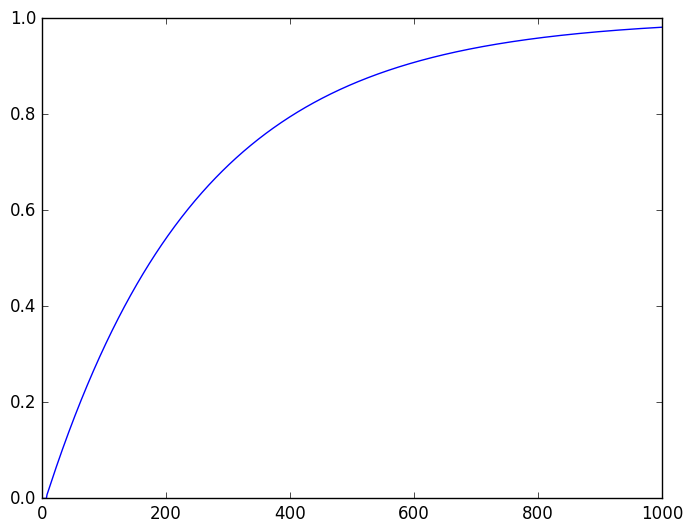

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000029740F60>

In [19]:
using PyPlot
plot(1:1000, p(1000))

In [20]:
p(100)[100]

0.3147671894238211

In [21]:
# Experimento numérico
contador = 0
N = 1000000
for i in 1:N
    x0 = -1
    cont = 1
    for j in 1:100
        x = rand(0:1)
        if x == x0
            cont +=1
        else
            cont = 1
            x0 = x
        end
        if cont>7
            contador +=1
            break
        end
    end
end
contador/N

0.314284

Problema 6 (b)
En el problema anterior calculamos la probabilidad de que salga una cadena de tamaño 8. De forma similar podemos calcular una cadena de tamaño N. En ese caso, tendríamos que usar las fórmulas recurrentes: 

$p'(n) = 0$ para $n<N$  $p'(n) = \frac{n-6}{2^N}$ para $N-1<n<2N$ y $p'(n) = p'(Nk-1)+\sum_{i=Nk-N}^{n-N} (1-p'(i))\frac{1}{2^N}$ para $Nk-1<n<Nk+N$  con $k>1 \in \mathbb{N}$

Esto se calcula numéricamente en la siguiente función de Julia. 

Ahora nos preguntamos qué distribución de tamaños cadenas es la más probable. 

Sabemos que las cadenas de tamaño 1 serán las más frecuentes, pero con qué probabilidad saldrán cadenas de tamaño 1? ¿Con qué probabilidad saldrán cadenas de tamaño N? 

En realidad este cálculo es mucho más sencillo. Para tener una cadena de tamaño N exactamente, debo tener N+2 tiros fijos, lo que implica una probabilidad de $\frac{1}{2^{N+1}}$ de sacar la cadena de tamaño N. Si se multiplica esto por el número de tiros (100), obtendremos el número más frecuente de veces que sale cada uno de los tamaños de cadena. 

Para 100 tiros, la distribución más probable es:

25 cadenas de tamaño 1, 13 cadenas de tamaño 2,  7 de tamaño 3, 3 de tamaño 4, 2 de tamaño 5 y 1 de tamaño 6

In [22]:
function p(n,N)
    if n<N
        return 0
    end
    if N-1<n<2N
        return (n-6)/2^N
    end
    j = 2N-1
    pp = []
    for i in 1:2N-1
        if i<N
            push!(pp,0)
        else
            push!(pp,(i-6)/2^N)
        end
    end
    k = 2
    while n> j
        j +=1
        if j> N-1+N*k
            k += 1
        end
        p2 = pp[N*k-1]+(1/2^N)*(j-N*k+1-sum(pp[N*k-N:j-N]))
        push!(pp,p2)
    end
    return pp
end          

p (generic function with 2 methods)

In [23]:
p(100,10)[100]

0.08846236335587565

Problema 7: 
a) La distribución de probabilidad de sacar una configuración exacta de $n$ elementos en los primeros $n$ tiros, es  $\frac{1}{2^n}$, por lo que la probabilidad de sacar n soles en los primeros n tiros y en el tiro $n+1$ sacar águila, es $p(n) = \frac{1}{2^{n+1}}$, por lo tanto. Si pagan $2^n$ pesos por llegar a $n$ soles, entonces, el valor esperado es: $\sum_{n=0}^\infty 2^n p(n) = \sum_{n=0}^\infty  \frac{2^n}{2^{n+1}} = \sum_{n=0}^\infty  \frac{1}{2} = \infty$, o sea, el valor esperado diverge. Incluso si pensamos que se hace un cobro fijo por tiro, $\sum_{n=0}^\infty 2^n p(n) - cobro \cdot n \frac{1}{2^{n+1}}= \sum_{n=0}^\infty  \frac{2^n}{2^{n+1}} - cobro  \frac{n}{2^{n+1}} = (\sum_{n=0}^\infty  \frac{1}{2}) -cobro  \frac{3}{2} = \infty$

b) Uno podría pensar que el casino tendría que cobrar una cantidad infinita de dinero para ganar algo en el juego, pero puesto que la probabilidad de ganar en cada tiro se reduce enormemente, por lo que hay valores que no sucederán en el tiempo de vida del universo. Supongamos que se juegan 10^5 veces juegos por día (lo cual es ya muy exagerado) y que el casino está abierto los 365 días del año por 1000 años (también exagerado). Entonces, habrá unos $365\cdot 10^8$ juego en su existencia. Pensemos que son $10^11$ juegos para exagerar las cosas. Tener 100 repeticiones de sol tiene una probabilidad de al rededir de $10^{-30}$ o sea que en sacar ese número de soles tiene tardará, casi 20 órdenes de magnitud más que el tiempo del casino. O sea, la probabilidad de sacar ese número es de $10^{-19}$ aprox. por lo que podemos considerar que no saldrá y si saliera y eso quebrara al casino, probabilemente no tendría que pagar su deuda utilizando recursos legales. 

$\sum_{n=0}^{100} 2^n p(n) -cobro \cdot p(n)= \sum_{n=0}^{100}  \frac{2^n}{2^{n+1}}-n\cdot  cobro  \frac{1}{2^{n+1}} = \sum_{n=0}^{100}  \frac{1}{2} -n\cdot  cobro   \frac{1}{2^{n+1}} \sim 50-3/2 cobro$, por lo que si cobra $34$ pesos, el casino tendrá una alta probabilidad de tener ganancias con el juego.

En realidad ganará mucho el casino. Abajo una simulación: 

In [24]:
cobro = 34
function juego(costo)
    test = 0
    contador = 0
    pago = 0
    while test == 0
        test = rand(0:1)
        contador += 1
        pago +=costo
    end
    ganancia = pago - 2^contador 
end
ganancia = 0
for i in 1:1000000
    ganancia += juego(cobro)
end
ganancia

16065152

El ejemplo de arriba muestra que aunque en realidad para el caso de infinitos juegos el casino pierde, con una probabilidad altísima gana en todos los juegos que realizará en su existencia. Algo similar se puede hacer en el juego de la ruleta. Aunque en general se pierda jugando a la ruleta, si se apuesta adecuadamente (y con muchísimo dinero) se puede lograr que la probabilidad de salir ganando sea muy alta (casi 1) a pesar de que el valor esperado sea menos infinito.  

Problema 8: 
Se trata nuevamente de tiros de Bernoulli. Entonces, la función de masa de probabilidad de que m espines apunten hacia arriba, será simplemente la distribución binomial. El valor esperado de la magnetización, es el valor esperado de los espines que apuntan hacia arriba, menos los que apuntan hacia abajo, entre 2. Para la desviación estandar, podemos obtenerla directamente usando la variancia de la distribución binomial y sacándole raiz. 

a) Puesto que el valor esperado de la distribución binomial es np, con n el número de tiros, la magnetización debe ser: $\frac{1}{2} (N\cdot p - N \cdot (1-p))$

b) La varianza de la distribución binomial es $np(1-p)$, por lo tanto la desviación estandar es $\sqrt{np(1-p)}$ en el caso del sistema de espines simplemente se sustituye la $n$ por $N$. $\sigma = \sqrt{np(1-p)}$

c) Sustituyendo los valores en las fórmulas, vemos que la magnetización es 0, mientras que su desviación estandar es $\frac{1}{2} \sqrt{N}$

d) Sustituyendo los valores en las fórmulas, vemos que la magnetización es $-\frac{1}{5}N$, mientras que su desviación estandar es $0.458 \sqrt{N}$

